# Log regression

In [316]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, metrics

In [317]:
X = pd.read_csv("Final.csv")

In [318]:
X

,Unnamed: 0,Company,0214price,0214amt,0514price,0514amt,0814price,0814amt,1114price,1114amt,0214-0514chng,0514-0814chng,0814-1114chng
0,0,1 800 FLOWERS COM,5.409870,48430,5.637158,37785,5.807883,30648,7.210945,20247,-10645,-7137,-10401
1,1,1ST SOURCE CORP,31.928269,60448,32.084393,50336,30.621486,47483,28.484152,38302,-10112,-2853,-9181
2,2,3-D SYS CORP DEL,92.933651,158059,59.149994,1404531,59.799876,2179252,46.370233,1777800,1246472,774721,-401452
3,3,3M CO,140.249912,1904593,135.660022,2373330,143.239747,2803342,141.680126,2126198,468737,430012,-677144
4,4,58 COM INC,38.362069,16240,41.630911,45447,54.059749,1679956,37.249791,2582538,29207,1634509,902582
5,5,8X8 INC NEW,10.130041,21224,10.801852,17497,8.060978,18236,6.662999,16359,-3727,739,-1877
6,6,AAON INC,31.952130,181991,27.877385,114896,33.523768,74216,17.020498,10928,-67095,-40680,-63288
7,7,AAR CORP,28.008015,307412,25.949072,156653,27.561312,188380,24.144751,136510,-150759,31727,-51870
8,8,AARONS INC,29.397647,145828,30.237308,355951,35.640023,161588,24.316016,129462,210123,-194363,-32126
9,9,ABB LTD,26.558963,450620,25.789026,775640,23.020101,756339,22.409757,833387,325020,-19301,77048


Fit a model that predicts the stock price of next quarter using the change of investment during that quarter by running least square regressions. 

In [319]:
# sp is the s&p500 price
sp0214 = 1838.630005
sp0514 = 1888.530029
sp0814 = 1955.180054
sp1114 = 2039.819946

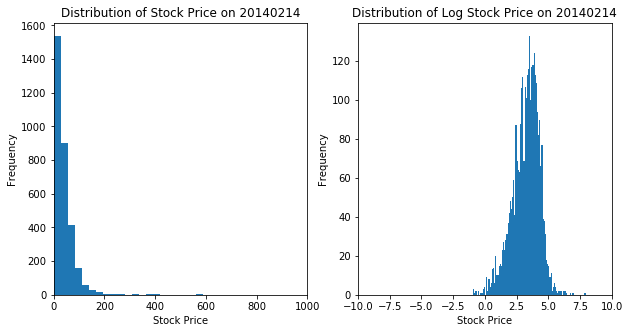

In [320]:
x = X['0214price']
x_log = np.log(x)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(x,bins =100)
plt.xlim(0, 1000)
plt.title("Distribution of Stock Price on 20140214")
plt.xlabel("Stock Price")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(x_log,bins =100)
plt.xlim(-10, 10)
plt.title("Distribution of Log Stock Price on 20140214")
plt.xlabel("Stock Price")
plt.ylabel("Frequency")

plt.show()

## First Quarter Investment

### First quarter investments on first quarter stock prices

/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


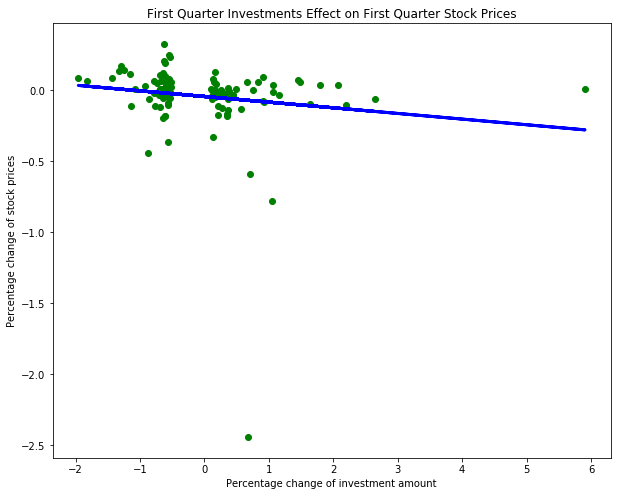

In [321]:
#First quarter investments on first quarter stock prices
X1 = X[(X['0214-0514chng'] >= 2000000) | (X['0214-0514chng'] < -2000000)]
y1 = (np.log(X1['0514price']) - np.log(X1['0214price'])) - (np.log(sp0514) - np.log(sp0214))
x1 = (X1['0214-0514chng'] - np.mean(X1['0214-0514chng']))/np.std(X1['0214-0514chng'])#y1 = ((np.log(X1['0514price']) - np.log(X1['0214price']))/np.log(X1['0214price']) - (np.log(sp0514) - np.log(sp0214))/np.log(sp0214))
length = np.size(x1)
x1 = x1.reshape(length, 1)
y1 = y1.reshape(length, 1)
regr = linear_model.LinearRegression()
regr.fit(x1, y1)
plt.figure(figsize=(10,8))
plt.scatter(x1, y1,  color='green')
plt.plot(x1, regr.predict(x1), color='blue', linewidth=3)
plt.title("First Quarter Investments Effect on First Quarter Stock Prices")
plt.ylabel("Percentage change of stock prices")
plt.xlabel("Percentage change of investment amount")
plt.show()

In [338]:
y1_pred = regr.predict(x1)
metrics.r2_score(y1, y1_pred)
err1 = y1_pred - y1 
err1 = (err1 - np.mean(err1))/np.std(err1)
#y1 = y1.transpose()
#y1_pred = y1_pred.transpose()
#np.corrcoef(y1, y1_pred)[0,1]**2
k = regr.get_params()
k

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

### First quarter investments on second quarter stock prices

/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


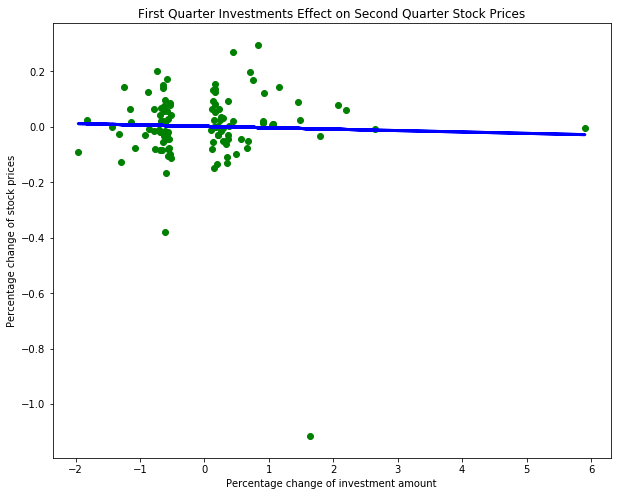

In [323]:
#First quarter investments on second quarter stock prices
X1 = X[(X['0214-0514chng'] >= 2000000) | (X['0214-0514chng'] < -2000000)]
y2 = (np.log(X1['0814price']) - np.log(X1['0514price'])) - (np.log(sp0814) - np.log(sp0514))
#X1['Y1'] = y1
#X1 = X1[(X1['Y1'] <= 0.2) & (X1['Y1'] >= -0.2)]
x2 = (X1['0214-0514chng'] - np.mean(X1['0214-0514chng']))/np.std(X1['0214-0514chng'])
#y1 = ((np.log(X1['0814price']) - np.log(X1['0514price']))/np.log(X1['0514price']) - (np.log(sp0514) - np.log(sp0214))/np.log(sp0214))
length = np.size(x2)
x2 = x2.reshape(length, 1)
y2 = y2.reshape(length, 1)
regr = linear_model.LinearRegression()
regr.fit(x2, y2)
plt.figure(figsize=(10,8))
plt.scatter(x2, y2,  color='green')
plt.plot(x2, regr.predict(x2), color='blue', linewidth=3)
plt.title("First Quarter Investments Effect on Second Quarter Stock Prices")
plt.ylabel("Percentage change of stock prices")
plt.xlabel("Percentage change of investment amount")
plt.show()

In [324]:
y2_pred = regr.predict(x2)
err2 = y2_pred - y2
err2 = (err2 - np.mean(err2))/np.std(err2)
metrics.r2_score(y2, y2_pred)

0.0012477460325346357

### First quarter investments on third quarter stock prices

/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


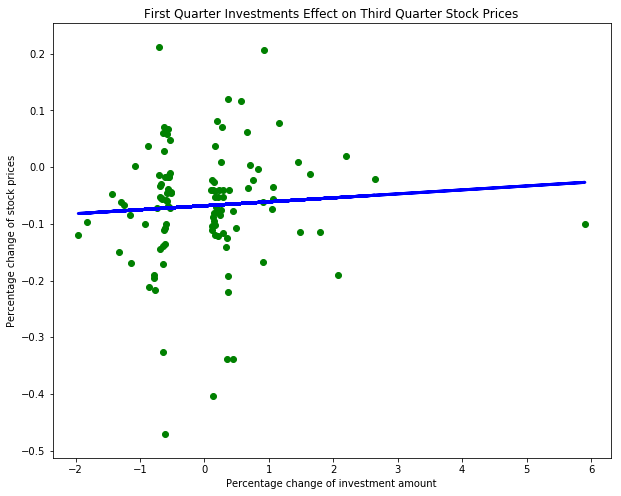

In [325]:
#First quarter investments on third quarter stock prices
X1 = X[(X['0214-0514chng'] >= 2000000) | (X['0214-0514chng'] < -2000000)]
y3 = ((np.log(X1['1114price']) - np.log(X1['0814price'])) - (np.log(sp1114) - np.log(sp0814)))
x3 = (X1['0214-0514chng'] - np.mean(X1['0214-0514chng']))/np.std(X1['0214-0514chng'])
length = np.size(x3)
x3 = x3.reshape(length, 1)
y3 = y3.reshape(length, 1)
regr = linear_model.LinearRegression()
regr.fit(x3, y3)
plt.figure(figsize=(10,8))
plt.scatter(x3, y3,  color='green')
plt.plot(x3, regr.predict(x3), color='blue', linewidth=3)
plt.ylabel("Percentage change of stock prices")
plt.xlabel("Percentage change of investment amount")
plt.title("First Quarter Investments Effect on Third Quarter Stock Prices")
plt.show()

In [326]:
y3_pred = regr.predict(x3)
metrics.r2_score(y3, y3_pred)
err3 = y3_pred - y3
err3 = (err3 - np.mean(err3))/np.std(err3)

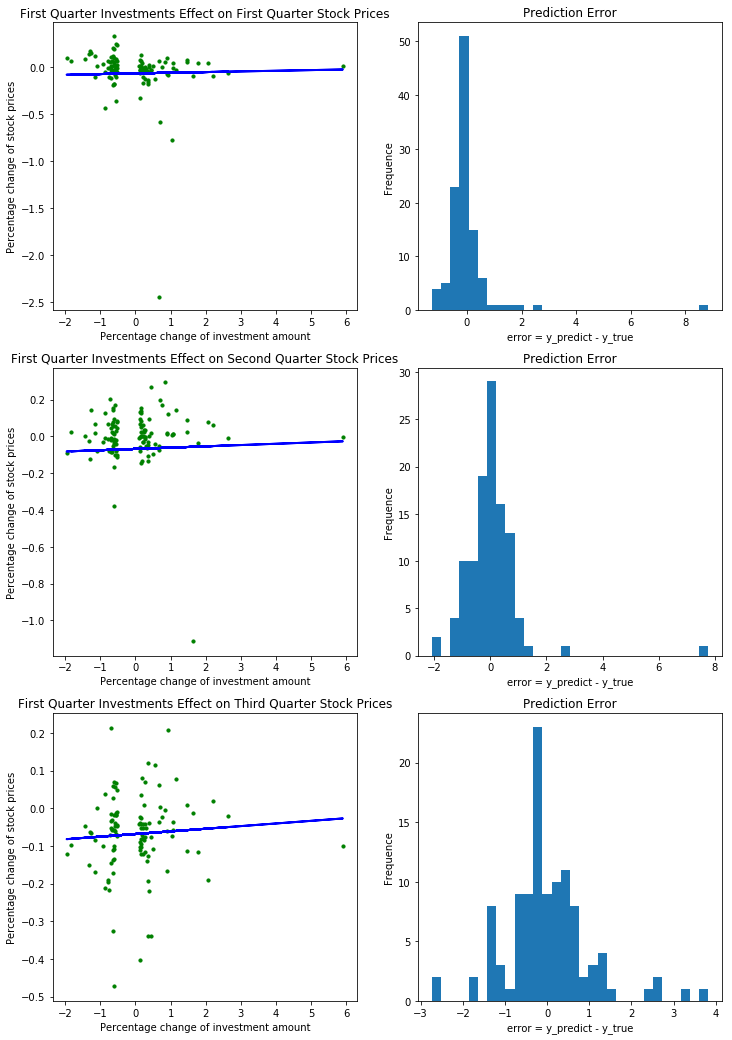

In [327]:
# make the plots on the same graph
plt.figure(figsize=(12,18))

plt.subplot(3,2,1)
plt.scatter(x1, y1,  color='green', s=10)
plt.plot(x1, regr.predict(x1), color='blue', linewidth=2)
plt.title("First Quarter Investments Effect on First Quarter Stock Prices")
plt.ylabel("Percentage change of stock prices")
plt.xlabel("Percentage change of investment amount")

plt.subplot(3,2,2)
plt.hist(err1,bins=30)
plt.title("Prediction Error")
plt.ylabel("Frequence")
plt.xlabel("error = y_predict - y_true")

plt.subplot(3,2,3)
plt.scatter(x2, y2,  color='green', s=10)
plt.plot(x2, regr.predict(x2), color='blue', linewidth=2)
plt.title("First Quarter Investments Effect on Second Quarter Stock Prices")
plt.ylabel("Percentage change of stock prices")
plt.xlabel("Percentage change of investment amount")

plt.subplot(3,2,4)
plt.hist(err2, bins=30)
plt.title("Prediction Error")
plt.ylabel("Frequence")
plt.xlabel("error = y_predict - y_true")

plt.subplot(3,2,5)
plt.scatter(x3, y3,  color='green', s=10)
plt.plot(x3, regr.predict(x3), color='blue', linewidth=2)
plt.ylabel("Percentage change of stock prices")
plt.xlabel("Percentage change of investment amount")
plt.title("First Quarter Investments Effect on Third Quarter Stock Prices")
          
plt.subplot(3,2,6)
plt.hist(err3, bins=30)
plt.title("Prediction Error")
plt.ylabel("Frequence")
plt.xlabel("error = y_predict - y_true")

plt.show()

## Second Quarter Invesment

/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


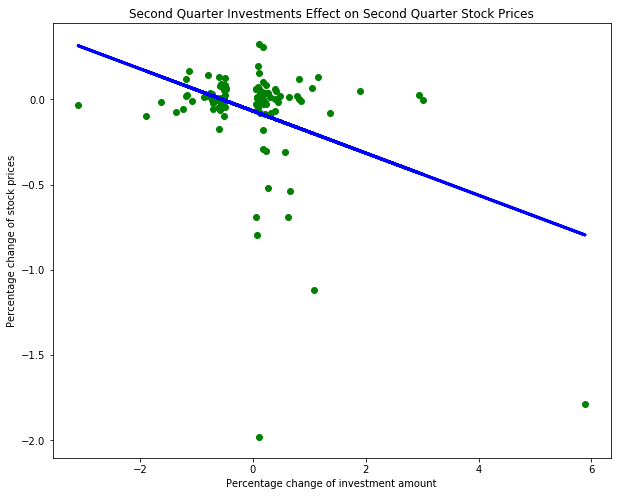

In [328]:
#Second quarter investments on Second quarter stock prices
X2 = X[(X['0514-0814chng'] >= 2000000) | (X['0514-0814chng'] < -2000000)]
y1 = ((np.log(X2['0814price']) - np.log(X2['0514price']))- (np.log(sp0814) - np.log(sp0514)))
x1 = (X2['0514-0814chng'] - np.mean(X2['0514-0814chng']))/np.std(X2['0514-0814chng'])
length = np.size(x1)
x1 = x1.reshape(length, 1)
y1 = y1.reshape(length, 1)
regr = linear_model.LinearRegression()
regr.fit(x1, y1)
plt.figure(figsize=(10,8))
plt.scatter(x1, y1,  color='green')
plt.plot(x1, regr.predict(x1), color='blue', linewidth=3)
plt.title("Second Quarter Investments Effect on Second Quarter Stock Prices")
plt.ylabel("Percentage change of stock prices")
plt.xlabel("Percentage change of investment amount")
plt.show()

In [329]:
y1_pred = regr.predict(x1)
metrics.r2_score(y1, y1_pred)
err4 = y1_pred - y1
err4 = (err4 - np.mean(err4))/np.std(err4)

/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


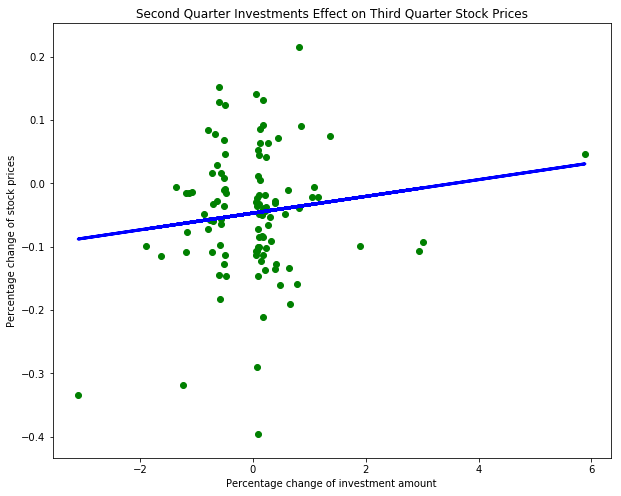

In [330]:
#Second quarter investments on Third quarter stock prices
X2 = X[(X['0514-0814chng'] >= 2000000) | (X['0514-0814chng'] < -2000000)]
y2 = ((np.log(X2['1114price']) - np.log(X2['0814price'])) - (np.log(sp0814) - np.log(sp0514)))
x2 = (X2['0514-0814chng'] - np.mean(X2['0514-0814chng']))/np.std(X2['0514-0814chng'])
length = np.size(x1)
x2 = x2.reshape(length, 1)
y2 = y2.reshape(length, 1)
regr = linear_model.LinearRegression()
regr.fit(x2, y2)
plt.figure(figsize=(10,8))
plt.scatter(x2, y2,  color='green')
plt.plot(x2, regr.predict(x2), color='blue', linewidth=3)
plt.title("Second Quarter Investments Effect on Third Quarter Stock Prices")
plt.ylabel("Percentage change of stock prices")
plt.xlabel("Percentage change of investment amount")
plt.show()

In [331]:
y2_pred = regr.predict(x2)
metrics.r2_score(y2, y2_pred)
err5 = y2_pred - y2
err5 = (err5 - np.mean(err5))/np.std(err5)

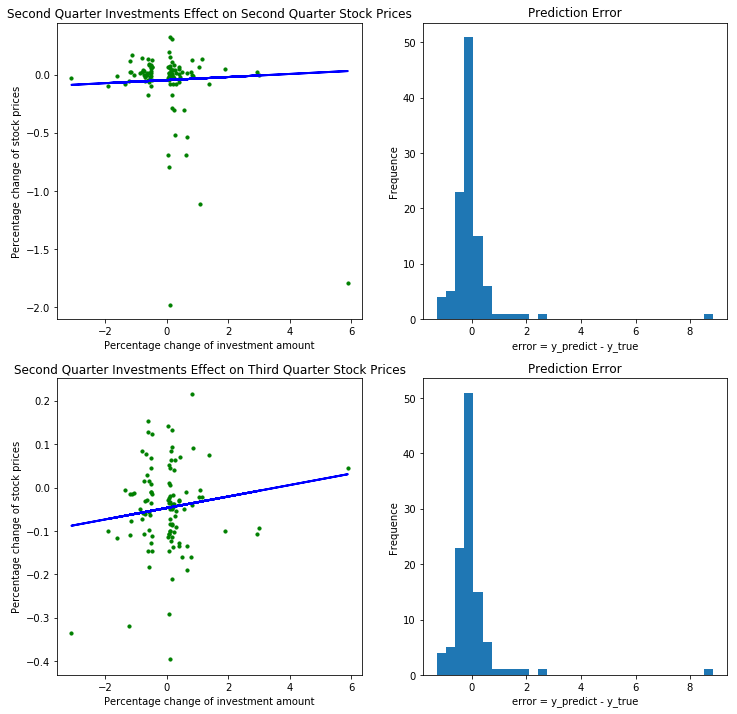

In [332]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.scatter(x1, y1,  color='green', s=10)
plt.plot(x1, regr.predict(x1), color='blue', linewidth=2)
plt.title("Second Quarter Investments Effect on Second Quarter Stock Prices")
plt.ylabel("Percentage change of stock prices")
plt.xlabel("Percentage change of investment amount")

plt.subplot(2,2,2)
plt.hist(err1,bins=30)
plt.title("Prediction Error")
plt.ylabel("Frequence")
plt.xlabel("error = y_predict - y_true")

plt.subplot(2,2,3)
plt.scatter(x2, y2,  color='green', s=10)
plt.plot(x2, regr.predict(x2), color='blue', linewidth=2)
plt.title("Second Quarter Investments Effect on Third Quarter Stock Prices")
plt.ylabel("Percentage change of stock prices")
plt.xlabel("Percentage change of investment amount")

plt.subplot(2,2,4)
plt.hist(err1,bins=30)
plt.title("Prediction Error")
plt.ylabel("Frequence")
plt.xlabel("error = y_predict - y_true")

plt.show()

## Third Quarter Investment

/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/mac/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


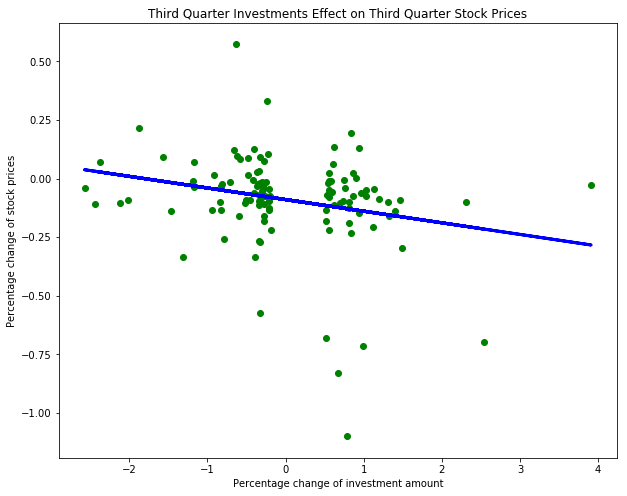

In [333]:
#Third quarter investments on Third quarter stock prices
X2 = X[(X['0814-1114chng'] >= 2000000) | (X['0814-1114chng'] < -2000000)]
y1 = ((np.log(X2['1114price']) - np.log(X2['0814price'])) - (np.log(sp0814) - np.log(sp0514)))
x1 = (X2['0814-1114chng'] - np.mean(X2['0814-1114chng']))/np.std(X2['0814-1114chng'])
length = np.size(x1)
x1 = x1.reshape(length, 1)
y1 = y1.reshape(length, 1)
regr = linear_model.LinearRegression()
regr.fit(x1, y1)
plt.figure(figsize=(10,8))
plt.scatter(x1, y1,  color='green')
plt.plot(x1, regr.predict(x1), color='blue', linewidth=3)
plt.title("Third Quarter Investments Effect on Third Quarter Stock Prices")
plt.ylabel("Percentage change of stock prices")
plt.xlabel("Percentage change of investment amount")
plt.show()

In [334]:
y1_pred = regr.predict(x1)
metrics.r2_score(y1, y1_pred)
err6 = y1_pred - y1
err6 = (err6 - np.mean(err6))/np.std(err6)

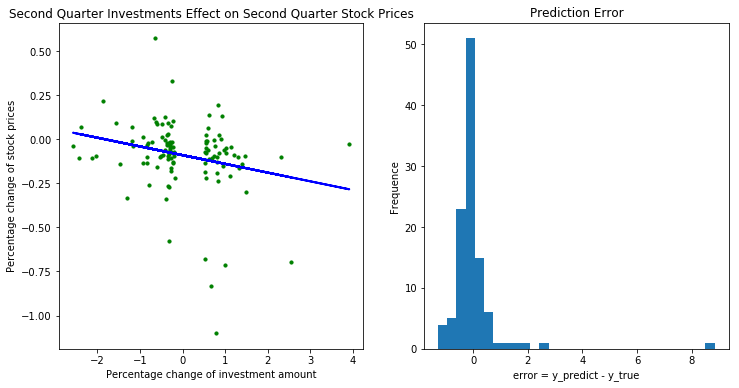

In [335]:
plt.figure(figsize=(12,6))


plt.subplot(1,2,1)
plt.scatter(x1, y1,  color='green', s=10)
plt.plot(x1, regr.predict(x1), color='blue', linewidth=2)
plt.title("Second Quarter Investments Effect on Second Quarter Stock Prices")
plt.ylabel("Percentage change of stock prices")
plt.xlabel("Percentage change of investment amount")

plt.subplot(1,2,2)
plt.hist(err1,bins=30)
plt.title("Prediction Error")
plt.ylabel("Frequence")
plt.xlabel("error = y_predict - y_true")
plt.show()

In [ ]:
X